In [110]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as snb
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.layers import Dropout
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import os
import cv2
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import img_to_array, load_img , ImageDataGenerator


In [ ]:
# connect to google drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# importing file contianing labels
file_path='/content/drive/My Drive/Math Techniques/Project Data/HAM10000_metadata.csv'
label_df= pd.read_csv(file_path)

In [112]:
label_df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [113]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}
label_df['cell_type'] = label_df['dx'].map(lesion_type_dict)

In [114]:
label_df

,lesion_id,image_id,dx,dx_type,age,sex,localization,cell_type
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,Benign keratosis-like lesions
...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,Actinic keratoses
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,Actinic keratoses
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,Actinic keratoses
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,Actinic keratoses


In [115]:
# Gender-wise data breakdown
snb.set_style('darkgrid')

fig,axes = plt.subplots(figsize=(12,8))

ax = snb.countplot(x='sex',data=label_df, palette = 'Paired')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Gender-wise Distribution')
plt.xticks(rotation=45)
plt.show()

In [116]:
# Cell Types that affects patients
fig,axes = plt.subplots(figsize=(12,8))
snb.countplot(x='cell_type',data=label_df, order = label_df['cell_type'].value_counts().index ,palette = 'Paired' )
for container in ax.containers:
    ax.bar_label(container)
plt.title('Cell Types Skin Cancer Affected patients')
plt.xticks(rotation=45)
plt.show()

In [117]:
# Gender Vs Cell-Type
fig,axes = plt.subplots(figsize=(12,8))
ax = snb.countplot(x='cell_type',hue='sex', data=label_df, order = label_df['cell_type'].value_counts().index, palette = 'Paired')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Cell Types Frequencies')
plt.xticks(rotation=45)
plt.show()

In [118]:
# Cell Type
fig,axes = plt.subplots(figsize=(12,8))
ax = snb.countplot(x='dx_type',data=label_df, order = label_df['dx_type'].value_counts().index, palette = 'flare')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Cell Types Frequencies')
plt.xticks(rotation=45)
plt.show()

In [119]:
# Gender-wise cell type distribution
fig,axes = plt.subplots(figsize=(12,8))
ax = snb.countplot(x='dx_type',hue='sex', data=label_df, order = label_df['dx_type'].value_counts().index, palette = 'flare')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Cell Types Frequencies')
plt.xticks(rotation=45)
plt.show()

In [120]:
# Localization Area
fig,axes = plt.subplots(figsize=(12,8))
ax = snb.countplot(x='localization',data=label_df, order = label_df['localization'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Localization Area Frequencies')
plt.xticks(rotation=45)
plt.show()

In [121]:
# Genderwise Localization Area
fig,axes = plt.subplots(figsize=(12,8))
ax = snb.countplot(x='localization',hue='sex', data=label_df, order = label_df['localization'].value_counts().index, palette = 'crest')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Localization Area Frequencies')
plt.xticks(rotation=45)
plt.show()

In [122]:
# Age
fig,axes = plt.subplots(figsize=(12,8))
ax = snb.histplot(data=label_df, x='age')
plt.title('Age Histogram')
plt.show()

In [123]:
# Genderwise Age distribution
fig,axes = plt.subplots(figsize=(12,8))
ax = snb.histplot(data=label_df, x='age',hue='sex',multiple='stack')
plt.title('Age Histogram Gender Wise')
plt.show()

In [124]:
# Cell Type vs Age distribution
fig,axes = plt.subplots(figsize=(12,8))
ax = snb.histplot(data=label_df, x='age',hue='cell_type',multiple='stack')
plt.title('Age Histogram Cell Type Wise')
plt.show()

In [125]:
#  Localization Vs Area
fig,axes = plt.subplots(figsize=(12,8))
ax = snb.histplot(data=label_df, x='age',hue='localization',multiple='stack')
plt.title('Age Histogram Localization Area Wise')
plt.show()

In [126]:
# modify the image_id format
label_df['image_id'] = label_df['image_id'].astype(str) + '.jpg'
label_df[:5]

,lesion_id,image_id,dx,dx_type,age,sex,localization,cell_type
0,HAM_0000118,ISIC_0027419.jpg,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions
1,HAM_0000118,ISIC_0025030.jpg,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions
2,HAM_0002730,ISIC_0026769.jpg,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions
3,HAM_0002730,ISIC_0025661.jpg,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions
4,HAM_0001466,ISIC_0031633.jpg,bkl,histo,75.0,male,ear,Benign keratosis-like lesions


In [127]:
image_directory1 = '/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1'
image_directory2 = '/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2'
image_files1 = os.listdir(image_directory1)
image_files2 = os.listdir(image_directory2)
all_image_files = image_files1 + image_files2

In [128]:
## encoding the caterorical class names(dx) to number(label)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
label_df['label']=le.fit_transform(label_df['dx'])

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [129]:
label_df

,lesion_id,image_id,dx,dx_type,age,sex,localization,cell_type,label
0,HAM_0000118,ISIC_0027419.jpg,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,2
1,HAM_0000118,ISIC_0025030.jpg,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,2
2,HAM_0002730,ISIC_0026769.jpg,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,2
3,HAM_0002730,ISIC_0025661.jpg,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,2
4,HAM_0001466,ISIC_0031633.jpg,bkl,histo,75.0,male,ear,Benign keratosis-like lesions,2
...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084.jpg,akiec,histo,40.0,male,abdomen,Actinic keratoses,0
10011,HAM_0002867,ISIC_0033550.jpg,akiec,histo,40.0,male,abdomen,Actinic keratoses,0
10012,HAM_0002867,ISIC_0033536.jpg,akiec,histo,40.0,male,abdomen,Actinic keratoses,0
10013,HAM_0000239,ISIC_0032854.jpg,akiec,histo,80.0,male,face,Actinic keratoses,0


In [130]:
label_dict = dict(zip(label_df['cell_type'] , label_df['label']))
print(label_dict)

{'Benign keratosis-like lesions ': 2, 'Melanocytic nevi': 5, 'Dermatofibroma': 3, 'Melanoma': 4, 'Vascular lesions': 6, 'Basal cell carcinoma': 1, 'Actinic keratoses': 0}


In [131]:
# Create a mapping between image files and labels
image_label_mapping = label_df.set_index('image_id')['label'].to_dict()

#  Merge data
data_all = pd.DataFrame({'image_name': all_image_files})
data_all['label'] = data_all['image_name'].apply(lambda x: image_label_mapping.get(x, None))

In [132]:
data_all.isnull().sum()
print(data_all[:5])

         image_name  label
0  ISIC_0028933.jpg      5
1  ISIC_0028394.jpg      5
2  ISIC_0027799.jpg      5
3  ISIC_0028100.jpg      2
4  ISIC_0027960.jpg      2


In [133]:
class_counts = np.bincount(data_all['label'].dropna().astype(int))

    # Print the count for each class
for class_label, count in enumerate(class_counts):
    print(f"Class {class_label}: {count} occurrences")

Class 0: 327 occurrences
Class 1: 514 occurrences
Class 2: 1099 occurrences
Class 3: 115 occurrences
Class 4: 1113 occurrences
Class 5: 6705 occurrences
Class 6: 142 occurrences


In [134]:
sorted_data = data_all.sort_values(by='label')
sorted_data.head()

,image_name,label
10014,ISIC_0030344.jpg,0
1960,ISIC_0027700.jpg,0
1984,ISIC_0028941.jpg,0
1988,ISIC_0028517.jpg,0
1992,ISIC_0026152.jpg,0


In [135]:
sorted_data = sorted_data.query('label not in (1 , 2, 4)')
# 6,5,3,0

In [136]:
sorted_data.groupby('label').count()

,image_name
label,
0,327
3,115
5,6705
6,142


In [137]:
import random
# List to store image data and labels
image_data = []
labels = []
target_images= 2000 # number of images for class
target_size = (128, 128)
# Load and augment images
current_class_label = sorted_data.iloc[0]['label']
class_images = []

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

for index, row in sorted_data.iterrows():
    if row['label'] is not None:  # Skip images without labels
        if row['label'] != current_class_label:
            # Process the previous class
            if current_class_label is not None:
                class_length = len(class_images)
                if class_length < target_images:
                    # Perform data augmentation
                    image_data = image_data + class_images
                    labels = labels + ([current_class_label] * len(class_images))
                    ct = 0
                                   
                    a_want = target_images - class_length
                    for i in range(a_want):
                        # Placeholder for data augmentation logic
#                         
                        augmented_img_array = class_images[i % class_length]  # Randomly select an image
                        augmented_img_array = datagen.random_transform(augmented_img_array)  # Apply data augmentation
                        image_data.append(augmented_img_array)
                        labels.append(current_class_label)
                        ct += 1
                        
                else:
                    # Randomly select images to match the target size without augmentation
                    selected_images = random.sample(class_images, target_images)
                    for img_array in selected_images:
                        image_data.append(img_array)
                        labels.append(current_class_label)

            # Start processing the new class
            current_class_label = row['label']
            class_images = []

        # Load image
        if row['image_name'] in image_files1:
            img_path = os.path.join(image_directory1, row['image_name'])
        else:
            img_path = os.path.join(image_directory2, row['image_name'])

        img = load_img(img_path, target_size=target_size)
        img_array = img_to_array(img)
        img_array /= 255.0  # Normalize pixel values
        class_images.append(img_array)

# Process the last class
class_length = len(class_images)
if class_length < target_images:
    
      
    # Perform data augmentation
    
    image_data = image_data + class_images
    labels = labels + ([current_class_label] * len(class_images))
    ct_1 = 0
    
    a_want = target_images - class_length
    for i in range(a_want):
        augmented_img_array = class_images[i % class_length]  
        augmented_img_array = datagen.random_transform(augmented_img_array)  # Apply data augmentation
        image_data.append(augmented_img_array)
        labels.append(current_class_label)
        ct_1 += 1
            


else:
    # Randomly select images to match the target size without augmentation
    selected_images = random.sample(class_images, target_images)
    for img_array in selected_images:
        image_data.append(img_array)
        labels.append(current_class_label)

0 ----> 1673
3 ----> 1885
6 ----> 1858


In [140]:
print(len(labels))
print(len(image_data))
print(data_all.isnull().sum())

8000
8000
image_name    0
label         0
dtype: int64


In [141]:
labels.count(0)

2000

In [142]:
from collections import defaultdict

# Initialize a defaultdict to include all classes
class_counts = defaultdict(int)

# Update the counts while iterating through labels
for label in labels:
    class_counts[label] += 1

# Print the count for each class
for class_label, count in class_counts.items():
    print(f"Class {class_label}: {count} occurrences")


Class 0: 2000 occurrences
Class 3: 2000 occurrences
Class 5: 2000 occurrences
Class 6: 2000 occurrences


In [144]:
# Convert labels to categorical format
labels = to_categorical(labels)
labels[:5]

array([[1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [180]:
x,x_test,y,y_test=train_test_split(image_data,labels,test_size=0.15,random_state=42)
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.15,random_state=42)
x_train_array = np.array(x_train)
y_train_array = np.array(y_train)
x_val_array = np.array(x_val)
y_val_array = np.array(y_val)
x_test_array = np.array(x_test)
y_test_array = np.array(y_test)

In [183]:
x_train_array.shape , x_test_array.shape , y_train.shape , y_test.shape

((5780, 128, 128, 3), (1200, 128, 128, 3), (5780, 7), (1200, 7))

In [184]:
# from glob import glob
#import matplotlib.pyplot as plt
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model

In [185]:
inception = InceptionV3(input_shape=(128,128,3), weights='imagenet', include_top=False)
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

# our layers - you can add more if you want
x = Flatten()(inception.output)
prediction = Dense(y_train_array.shape[1] , activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)
# view the structure of the model
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d_192 (Conv2D)         (None, 63, 63, 32)           864       ['input_6[0][0]']             
                                                                                                  
 batch_normalization_188 (B  (None, 63, 63, 32)           96        ['conv2d_192[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_188 (Activation  (None, 63, 63, 32)           0         ['batch_normalization_18

In [186]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [187]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale = 1./255)

In [190]:
# Make sure you provide the same target size as initialied for the image size
training_set = datagen.flow(x=x_train_array,y=y_train_array,
                                                 batch_size = 30,
                                                 shuffle=True)


In [191]:
testing_set = test_datagen.flow(x_val_array, y_val_array, batch_size=30, shuffle=False)

In [192]:
r = model.fit_generator(
  training_set,
  validation_data=testing_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(testing_set)
)

Epoch 1/20


/tmp/ipykernel_48/2487168392.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


193/193 [==============================] - 28s 124ms/step - loss: 1.4003 - accuracy: 0.6235 - val_loss: 1.7219 - val_accuracy: 0.2706
Epoch 2/20
193/193 [==============================] - 23s 117ms/step - loss: 1.0378 - accuracy: 0.6950 - val_loss: 1.5388 - val_accuracy: 0.2441
Epoch 3/20
193/193 [==============================] - 23s 119ms/step - loss: 1.0578 - accuracy: 0.7221 - val_loss: 2.1799 - val_accuracy: 0.2598
Epoch 4/20
193/193 [==============================] - 23s 119ms/step - loss: 0.9916 - accuracy: 0.7375 - val_loss: 2.3512 - val_accuracy: 0.2559
Epoch 5/20
193/193 [==============================] - 23s 119ms/step - loss: 0.9119 - accuracy: 0.7431 - val_loss: 2.6354 - val_accuracy: 0.2196
Epoch 6/20
193/193 [==============================] - 23s 119ms/step - loss: 1.0444 - accuracy: 0.7375 - val_loss: 2.3630 - val_accuracy: 0.2559
Epoch 7/20
193/193 [==============================] - 23s 118ms/step - loss: 0.9598 - accuracy: 0.7612 - val_loss: 2.6729 - val_accuracy: 0.2

In [193]:
ypred = model.predict(x_test_array)

38/38 [==============================] - 2s 26ms/step


In [194]:
prediction=np.argmax(ypred,axis=1)
Y_data=np.argmax(y_test_array,axis=1)
accuracy=accuracy_score(Y_data,prediction)
print("accuracy score = {}".format(accuracy))

accuracy score = 0.8083333333333333


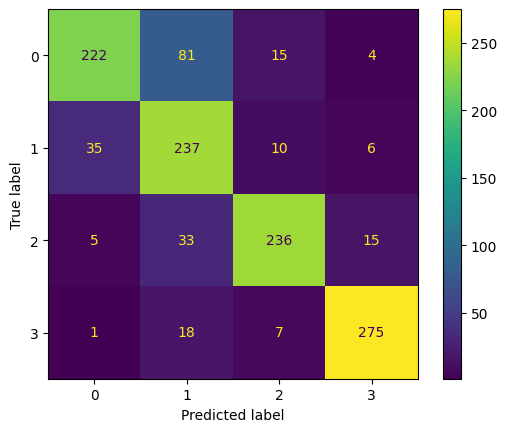

In [195]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
cm = confusion_matrix(Y_data , prediction)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

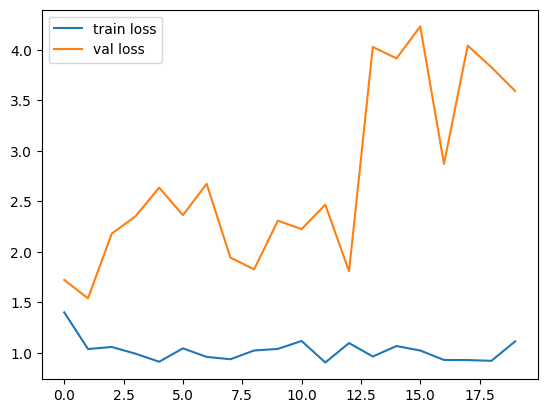

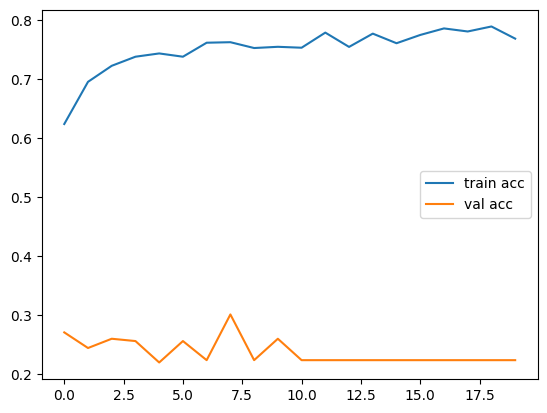

<Figure size 640x480 with 0 Axes>

In [196]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [204]:
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input

In [205]:
resnet = ResNet50(input_shape= (128,128,3), weights='imagenet', include_top=False)

# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False
    
# our layers - you can add more if you want
x = Flatten()(resnet.output)
prediction = Dense(y_train_array.shape[1], activation='softmax')(x)


# create a model object
model2 = Model(inputs=resnet.input, outputs=prediction)
# view the structure of the model
model2.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 134, 134, 3)          0         ['input_7[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 64, 64, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 64, 64, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [206]:
# tell the model what cost and optimization method to use
model2.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [207]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# train_datagen = ImageDataGenerator(rescale = 1./255,
#                                    shear_range = 0.2,
#                                    zoom_range = 0.2,
#                                    horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [208]:
# Make sure you provide the same target size as initialied for the image size
training_set = datagen.flow(x=x_train_array,y=y_train_array,
                                                 batch_size = 35,
                                                 shuffle=True)
testing_set = test_datagen.flow(x_val_array, y_val_array, batch_size=35, shuffle=False)


In [209]:
# fit the model
# Run the cell. It will take some time to execute
r = model2.fit_generator(
  training_set,
  validation_data=testing_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(testing_set)
)

Epoch 1/20


/tmp/ipykernel_48/1828155436.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model2.fit_generator(


166/166 [==============================] - 27s 141ms/step - loss: 1.4285 - accuracy: 0.2696 - val_loss: 1.4823 - val_accuracy: 0.2235
Epoch 2/20
166/166 [==============================] - 23s 139ms/step - loss: 1.3826 - accuracy: 0.3059 - val_loss: 1.5410 - val_accuracy: 0.2608
Epoch 3/20
166/166 [==============================] - 23s 137ms/step - loss: 1.3702 - accuracy: 0.3344 - val_loss: 1.5088 - val_accuracy: 0.2235
Epoch 4/20
166/166 [==============================] - 23s 137ms/step - loss: 1.3453 - accuracy: 0.3420 - val_loss: 1.6545 - val_accuracy: 0.2598
Epoch 5/20
166/166 [==============================] - 23s 137ms/step - loss: 1.3069 - accuracy: 0.3747 - val_loss: 1.4595 - val_accuracy: 0.2608
Epoch 6/20
166/166 [==============================] - 23s 137ms/step - loss: 1.3280 - accuracy: 0.3671 - val_loss: 1.4721 - val_accuracy: 0.2598
Epoch 7/20
166/166 [==============================] - 23s 137ms/step - loss: 1.3136 - accuracy: 0.3798 - val_loss: 1.4160 - val_accuracy: 0.2

In [210]:
ypred = model2.predict(x_test_array)

38/38 [==============================] - 2s 33ms/step


In [211]:
prediction=np.argmax(ypred,axis=1)
Y_data=np.argmax(y_test_array,axis=1)
accuracy=accuracy_score(Y_data,prediction)
print(accuracy)

0.5783333333333334


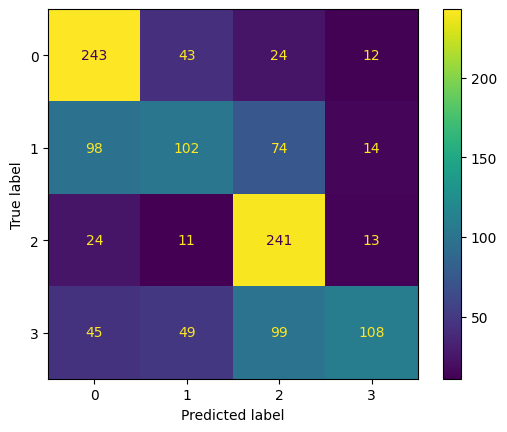

In [212]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
cm = confusion_matrix(Y_data , prediction)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

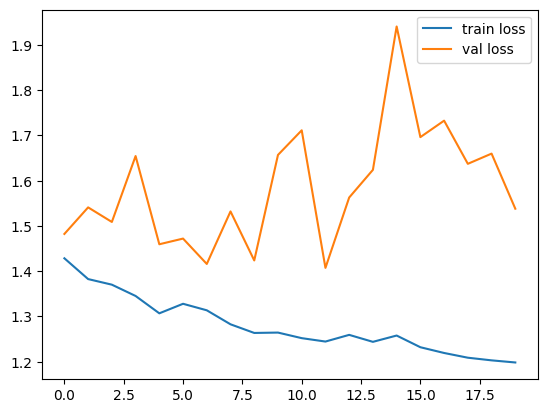

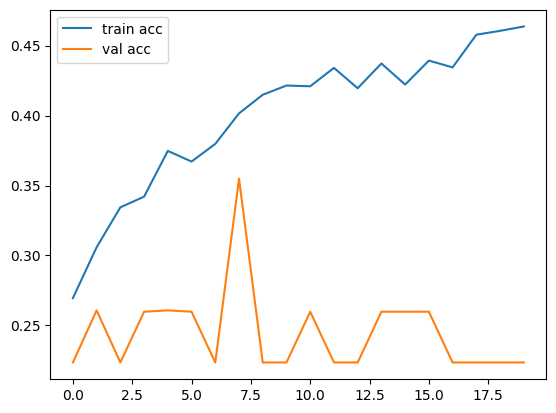

<Figure size 640x480 with 0 Axes>

In [213]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')